# Gaussian processes

In [ ]:
# TODO: write the math behind it and implement the basic variant in numpy only
# Then use pymc3.gp for some sample data
#
# TODO: do the simplest implementation with numpy only also in the theory part?
#
# TODO: maybe have the theory part mixed with the code instead?
#
# Do regression (1d, 2d, 3d?, higher?), classification, and as latent variable model (non linear dimension reduction)
# TODO: regression on multioutput as well?
# TODO: also describe it as a model in pymc3/edward and try it that way?
# TODO: combine kernels for different parts in a signal. Maybe stock forecasting, kernel at monthly, daily scale, etc
# TODO: some gp approximation techniques, inducing points etc
# TODO: kernels for something different, like strings perhaps
#
# TODO: try gpflow also

# Theory

## Properties of gaussian distribution
Some of the important properties of gaussian that are relevant for this
* A sum of gaussian variables is also a gaussian variable $$p\left( \sum x_i \right) = \mathcal{N}(\sum \mu_i, \sum \sigma^2_i) \quad \text{where} \quad p(x_i) = \mathcal{N}(\mu_i, \sigma_i^2)$$


* Scaling of a gaussian variable is a gaussian $$p(ax) = \mathcal{N}(a\mu, a^2\sigma^2) \quad \text{where} \quad p(x) = \mathcal{N}(\mu, \sigma^2)$$


* The marginalization of one or a few of the variables in a multivariate gaussian is also a gaussian.

## Gaussian processes
Gaussian processes (GP) is a generalization to extend multivariate gaussian distributions to infinite dimensions. Thus it is the joint gaussian distribution of all those infinite number of variables. But since the marginalization of a finite subset of these infinite number of variables is also a gaussian we also have a multivariate gaussian over this finite subset of variables. Since GPs are defined with infinite dimensions in a continuous domain we can say that they are distributions over functions.

A gaussian process is fully defined by a **mean function** and a **covariance function**.

==========


Gaussian process is the joint distribution of all those (infinitely many) random variables, and as such, it is a distribution over functions with a continuous domain, e.g. time or space.

## Gaussian process regression
Bayesian linear regression is a good starting point to motivate gaussian processes. In this case the assumption is that the underlying function is linear, but we still allow uncertainty over the model parameters. This model is usually defined like this.

\begin{align*}
y_i &= \sum_j w_jx_{i,j}+ \epsilon_i = w^Tx_i + \epsilon_i && \text{Skipping intercept term here} \\
p(w) & && \text{Prior on weights} \\
\epsilon_i &\sim \mathcal{N}(0, \sigma^2I)
\end{align*}

TODO: more here

Often, this assumption is probably pretty bad so it's better to be more general and consider all possible functions instead. This can be done using a gaussian process as a prior over functions.

For a set of observations $y = \{ y_1, \ldots, y_n \}$ from inputs $x = \{ x_1, \ldots, x_n \}$, we can view the observations as a sample from a multivariate gaussian. Then by inferring from these observations we can find the posterior GP which we can use to form a predictive posterior distribution for new inputs.


================

nonparametric

In short: Use GP as a prior over functions, given observations we can make posterior predictions based on these observations.

**The problem:** Want to find a function $f$

Intuition: We use a similarity metric on observations, similar inputs -> similar outputs

covariance functions can be very flexible, even different data types

links
http://mlg.eng.cam.ac.uk/teaching/4f13/1617/gp%20and%20data.pdf
https://www.robots.ox.ac.uk/~mebden/reports/GPtutorial.pdf

### TODO
TODO, can be seen as distribution over functions, the gp prior, kernels

TODO: First bayesian linear regression, then into GPs
### Posterior
Bayes' rule
\begin{align*}
p(
\end{align*}

### Predictive distribution
\begin{align*}
p(y_*\ |\ x_*, f(x), x) &=
\end{align*}

### Numpy implementation
TODO description, TODO: also draw some functions from gp prior

In [3]:
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Observed data** generated from some underlying function.

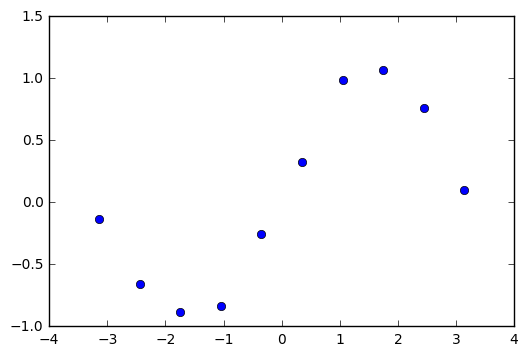

In [4]:
noise_mu = 0.0
noise_sigma = 0.1

X = np.linspace(-np.pi, np.pi, 10)
Y = np.sin(X) + noise_sigma * np.random.randn(X.shape[0])
plt.plot(X, Y, "o")

**Covariance function**

In [5]:
def rbf(sigma, l, xi, xj):
    return sigma * sigma * np.exp(-(xi - xj) * (xi - xj) / (l * l)) # TODO: make work for vectors too

k = partial(rbf, 1.0, 1.0)

**Gram matrix**

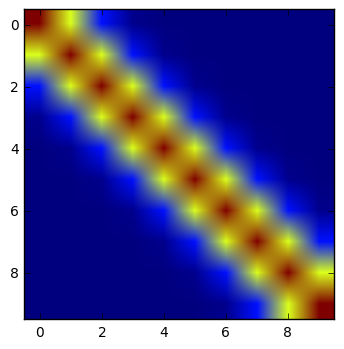

In [15]:
K = np.array([k(xi, xj) for xi in X for xj in X]).reshape(len(X), len(X))
plt.imshow(K)

**Sampled functions**

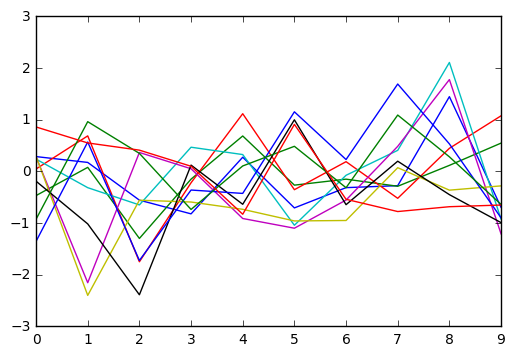

In [19]:
n = len(X)
sampled_functions = np.random.multivariate_normal(mean=np.zeros(n), cov=K, size=10)
plt.plot(sampled_functions)

**Points to predict**

In [4]:
X_star = np.linspace(-1.5*np.pi, 1.5*np.pi, 20)

# In practice
Doing some examples using a [GP library](https://github.com/SheffieldML/GPy) from Neil Lawrence's lab.

In [1]:
import random

import GPy
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from joblib import Memory
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
GPy.plotting.change_plotting_library("matplotlib")
%matplotlib inline
cache = Memory("cache", verbose=0)

## GP Regression

### Toy 1D example

In [200]:
# The function we are trying to find an approximation of
actual_function = lambda X: np.sin(X) + np.cos(X)

# Create some noisy samples of the actual function at random points
num_points = 30
X = np.random.uniform(-10, 10, (num_points, 1))
X.sort(axis=0) # Not necessary, but gives nicer covariance matrix plots
y = actual_function(X) + 0.05 * np.random.randn(num_points, 1)

# Create some points to infer the function value at, both in the same interval 
# as the known points and some slightly outside
X_unknown = np.vstack((np.random.uniform(-10, 10, (10, 1)), 
                       np.array([-12, -11, 11, 12])[:, np.newaxis]))

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


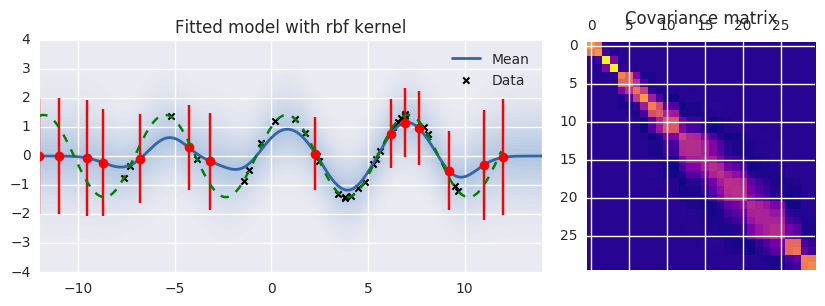

GP_regression.,value,constraints,priors
periodic_exponential.variance,1.0,+ve,
periodic_exponential.lengthscale,1.0,+ve,
periodic_exponential.period,6.28318530718,+ve,
Gaussian_noise.variance,1.0,+ve,


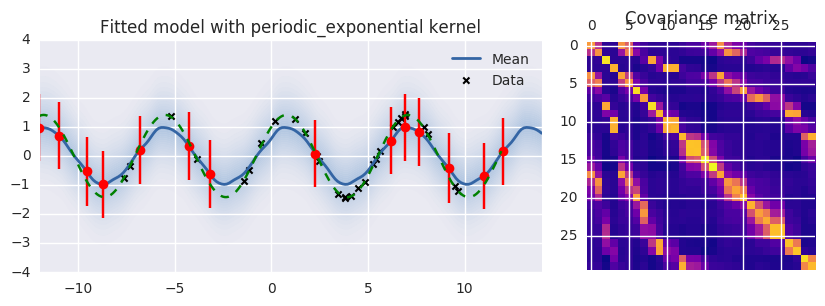

GP_regression.,value,constraints,priors
poly.variance,1.0,+ve,
poly.scale,1.0,+ve,
poly.bias,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


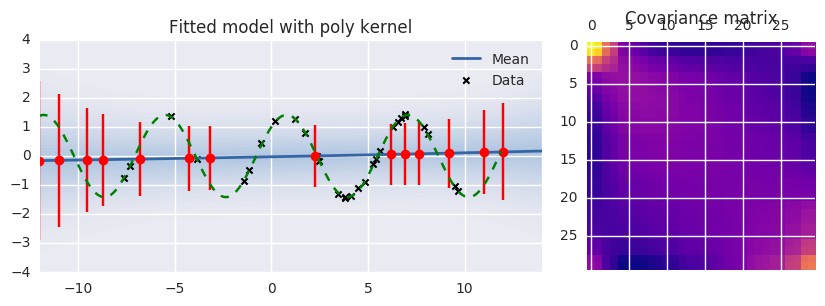

GP_regression.,value,constraints,priors
Brownian.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


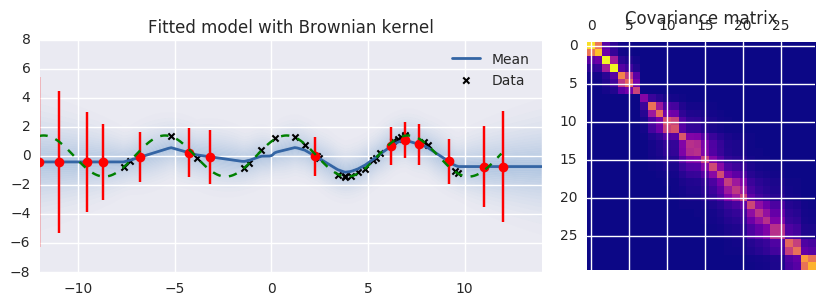

In [207]:
kernels = [
    GPy.kern.RBF(input_dim=1, lengthscale=1.0, variance=1.0),
    GPy.kern.PeriodicExponential(input_dim=1),
    GPy.kern.Poly(input_dim=1, order=2, variance=1.0),
    GPy.kern.Brownian(input_dim=1, variance=1.0)
]

for kernel in kernels:
    # Fit a model to the sample points using this kernel
    model = GPy.models.GPRegression(X, y, kernel)
    
    display(model)

    plt.figure(figsize=(10, 3))
    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((1, 3), (0, 2))
    
    model.plot(ax=ax1, plot_density=True)
    ax1.set_title("Fitted model with {} kernel".format(model.kern._name))
    
    # Show the posterior covariance
    ax2.matshow(model.posterior.covariance, cmap="plasma")
    ax2.set_title("Covariance matrix")
    
    # Predict the function value for the unknown points
    ypred_mean, ypred_var = model.predict(X_unknown)
    y_actual = actual_function(X_unknown)
    ax1.errorbar(X_unknown, ypred_mean, yerr=ypred_var, fmt="ro")
    
    # Also plot the actual function here
    x = np.arange(-12, 12, 0.1)
    ax1.plot(x, actual_function(x), "g--")
    
    plt.show()

### 2D example with city elevation data
Using some elevation data from cities in USA we can try to predict elevations over the entire country. This data is in some kind of GIS file format (shapefiles) that I don't know anything about and I didn't find information about what some of the fields in each row represents but with crossreferencing Wikipedia I think I found the elevation data and geographic positions at least, which is what we need for this task.

In [3]:
import shapefile

sf = shapefile.Reader("data/us-elevations/AmericanCityElevationPoints")

df = pd.DataFrame.from_records([(r[1], r[3], r[4]) for r in sf.records()], 
                               columns=["City", "State", "Elevation"])
geographic_positions = pd.DataFrame.from_records([s.points[0] for s in sf.shapes()], 
                                                 columns=["Longitude", "Latitude"])
df = pd.concat((df, geographic_positions), axis=1)

display(df.sample(5))

# Remove Hawaii and Alaska since they are pretty far away
df = df[~df.State.isin(["Hawaii", "Alaska"])]

,City,State,Elevation,Longitude,Latitude
887,Swissvale,Pennsylvania,920,-79.886239,40.420529
213,Norton Shores,Michigan,612,-86.252590,43.160065
669,Streator,Illinois,626,-88.831541,41.125304
2117,Montpelier,Vermont,525,-72.571552,44.266058
399,Ecorse,Michigan,585,-83.140380,42.249787


Now, let's fit a model to this data using an RBF kernel since our assumption is that points close to each other geographically should correlate elevation wise.

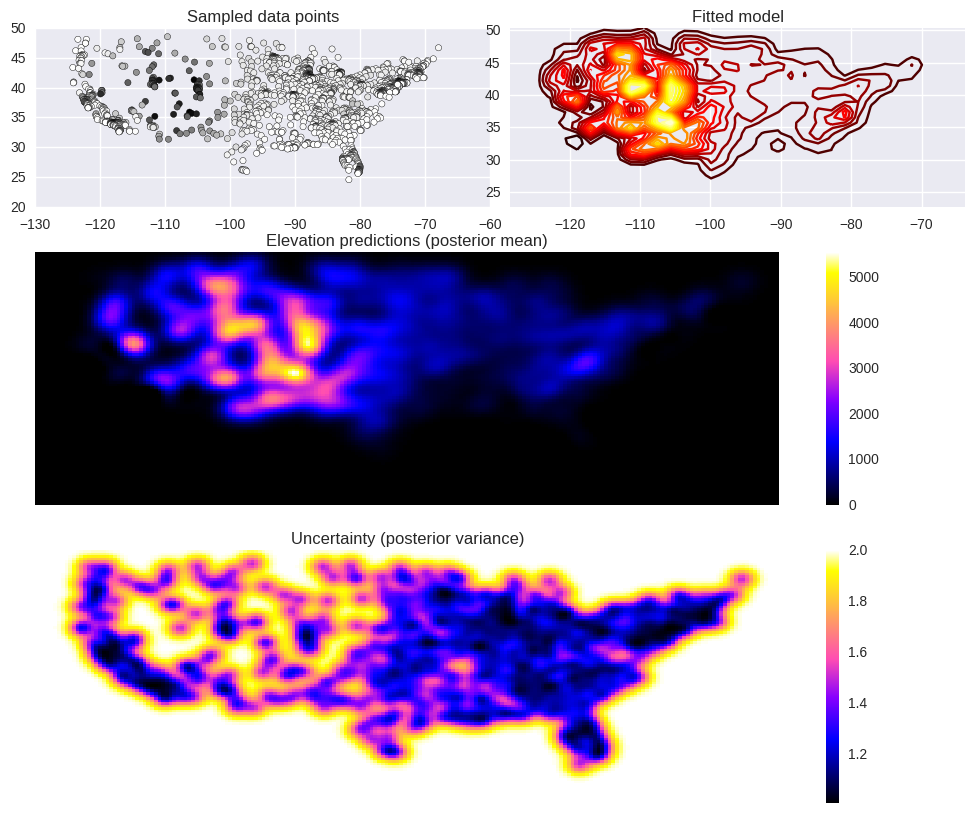

In [6]:
kernel = GPy.kern.RBF(input_dim=2, lengthscale=1.0, variance=1.0)
model = GPy.models.GPRegression(df[["Longitude", "Latitude"]].as_matrix(), 
                                df["Elevation"].as_matrix()[:, np.newaxis], 
                                kernel)

f = plt.figure(figsize=(12, 10))
ax1 = plt.subplot2grid((11, 8), (0, 0), rowspan=3, colspan=4)
ax2 = plt.subplot2grid((11, 8), (0, 4), rowspan=3, colspan=4)
ax3 = plt.subplot2grid((11, 8), (3, 0), rowspan=4, colspan=8)
ax4 = plt.subplot2grid((11, 8), (7, 0), rowspan=4, colspan=8)
f.subplots_adjust(hspace=1.5)

# Plot the given sampled data points
ax1.scatter(df["Longitude"].as_matrix(), df["Latitude"].as_matrix(), c=df["Elevation"].as_matrix())
ax1.set_title("Sampled data points")

# Plot the fitted model's mean function
model.plot(ax=ax2, plot_density=True, plot_data=False)
ax2.set_title("Fitted model")

# Predict elevations densely
longitudes = np.linspace(-128, -65, 200)
latitudes = np.linspace(20, 50, 100)
coords = np.array([[long, lat] for lat in latitudes for long in longitudes])
elevation_mean, elevation_var = model.predict(coords)

# Reshape to 2d arrays and reverse row order since latitudes increases upwards
elevation_mean = elevation_mean.reshape(len(latitudes), len(longitudes))[::-1]
elevation_var = elevation_var.reshape(len(latitudes), len(longitudes))[::-1]

sns.heatmap(elevation_mean, vmin=0, ax=ax3, xticklabels=False, yticklabels=False, cmap="gnuplot2")
ax3.set_title("Elevation predictions (posterior mean)")

sns.heatmap(elevation_var, ax=ax4, xticklabels=False, yticklabels=False, cmap="gnuplot2")
ax4.set_title("Uncertainty (posterior variance)")

plt.show()

## GP Classification

In [46]:
iris = sns.load_dataset("iris") # TODO: need harder dataset

# Want to do binary classification so let's arbitrarily put classes 0, 1 
# in the same classes for this task
iris["species"] = iris["species"].astype("category").cat.codes.apply(lambda l: 0 if l <= 1 else 1)

X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].as_matrix()
y = iris[["species"]].as_matrix()
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # TODO: should do split per class

In [47]:
# TODO: what kernel? combine somethings for diff features?
kernel = GPy.kern.RBF(input_dim=4, lengthscale=1.0, variance=1.0) 

model = GPy.models.GPClassification(X_train, y_train, kernel)

accuracy = np.sum(np.round(model.predict(X_test)[0]) == y_test) / len(y_test)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9736842105263158


## GP LVM
Using a dataset consisting 56443 fonts scraped by [Erik Bernhardsson](https://erikbern.com/) which can be downloaded [here](https://s3.amazonaws.com/erikbern/fonts.hdf5) I wanted to project these to a lower dimensional manifold using GP LVM as a non linear dimension reduction.

To reduce the amount of data here, we will only consider one letter and then find latent variables that describe the style of this letter in some way. We also reduce the raster size of the samples. TODO: use all fonts?

TODO: see http://www.cs.toronto.edu/~urtasun/tutorials/raquel_gplvm.pdf

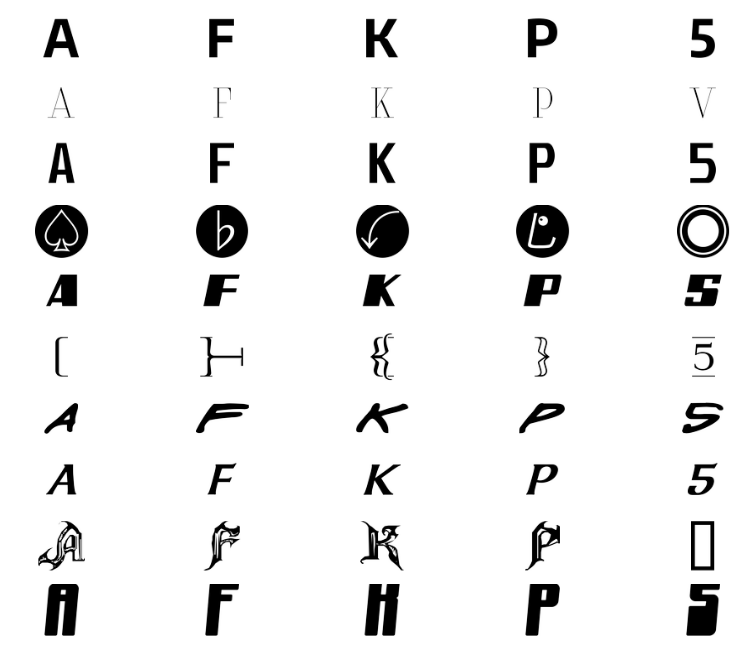

In [24]:
# First show some font samples
with h5py.File("/home/john/datasets/fonts.hdf5", "r") as hf:
    data = hf.get("fonts")
    _, axes = plt.subplots(10, 5, figsize=(10, 8))
    font_idxs = random.sample(range(data.shape[0]), 10)
    for i, font_idx in enumerate(font_idxs):
        for j, letter_idx in enumerate([0, 5, 10, 15, 57]):
            axes[i][j].imshow(data[font_idx][letter_idx])
            axes[i][j].axis("off")
    plt.show()

In [2]:
@cache.cache
def load_data():
    with h5py.File("/home/john/datasets/fonts.hdf5", "r") as hf:
        data = hf.get("fonts")
        X_fullsize = data[:, 0, ...].copy()
        
        num_fonts = X_fullsize.shape[0]
        size = (32, 32)
        
        X = np.vstack([resize(X_fullsize[i, ...], size).reshape(np.prod(size)) for i in range(num_fonts)])
        return X

(56443, 1024)


 /home/john/opt/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


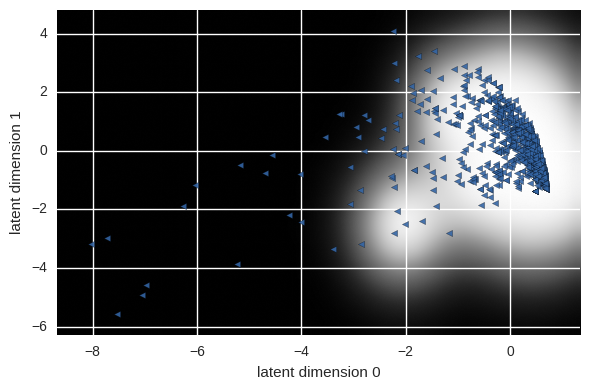

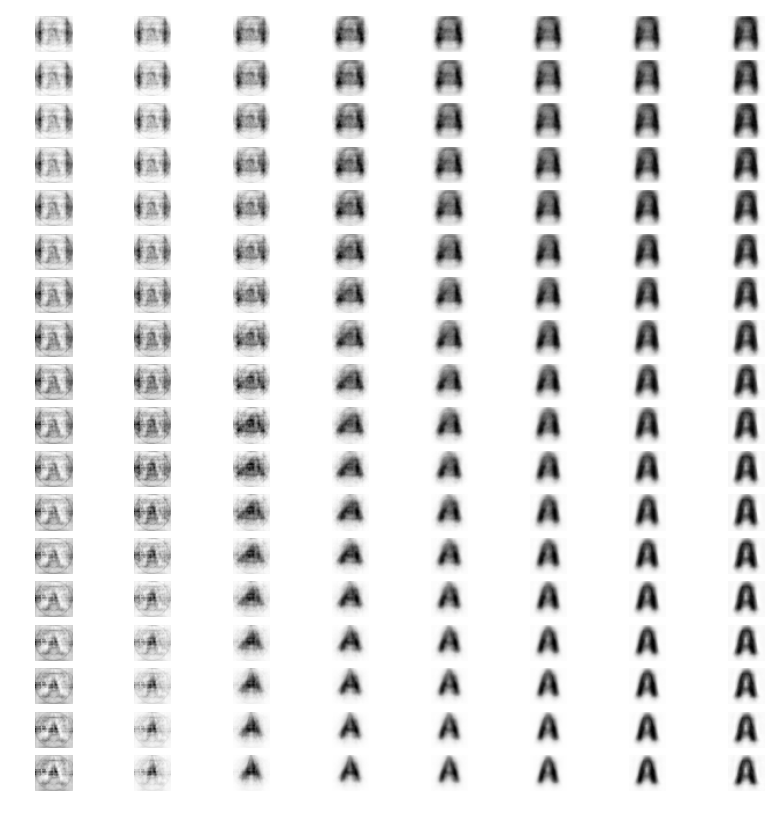

In [43]:
# TODO: compare with some linear dimension reduction also? and maybe tsne too

Y = load_data() # TODO: should this be called Y?
print(Y.shape)

# TODO: try some different models for this task. PCA, PPCA, tsne as well
# TODO: maybe use more latent dimensions

# Fit a model
#model = GPy.models.GPLVM(Y[:10000, :], input_dim=2)
model = GPy.models.BayesianGPLVM(Y[:1000, :], input_dim=2)
model.plot_latent()
_, axes = plt.subplots(8, 8, figsize=(10, 10))
#for i, latent1 in enumerate(np.linspace(-3, 0.8, 8)):
for i, latent1 in enumerate(np.linspace(-1, 0.3, 8)):
    for j, latent2 in enumerate(np.linspace(-2, 2, 8)):
        axes[i][j].imshow(model.predict(np.array([[latent1, latent2]]))[0].reshape(32, 32)) # TODO: do all preds at once
        axes[i][j].axis("off")

#plt.imshow(model.predict(np.array([[-1.0, 0]]))[0].reshape(32, 32))